# Pima Indians Diabetes Detection
## Project to Predict the onset of diabetes based on diagnostic measures

## Context


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



### Content


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set
diabetis_data = pd.read_csv("/Users/azharsharieff/Desktop/Diabetis_detection/diabetis.csv")
diabetis_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
print(diabetis_data.shape)
print("\n****************************\n")
print(diabetis_data.info())
print("\n****************************\n")
diabetis_data.describe()

(768, 9)

****************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

****************************



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
# checking for missing values
diabetis_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploaratory Data Analysis

In [7]:
def boxplots(df,col):
    sns.boxplot(df[col], orient='v')
    plt.title(col)
    plt.show()

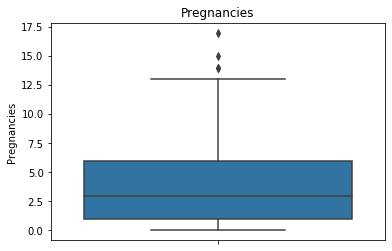

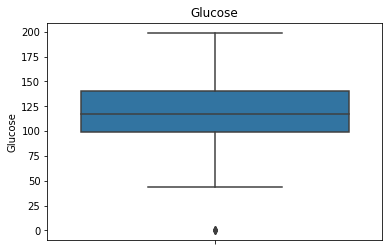

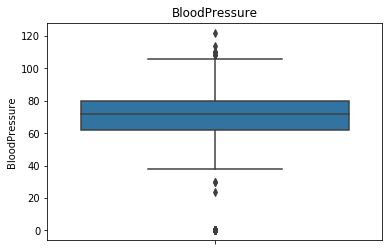

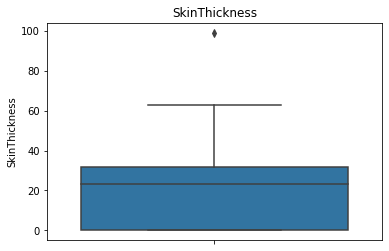

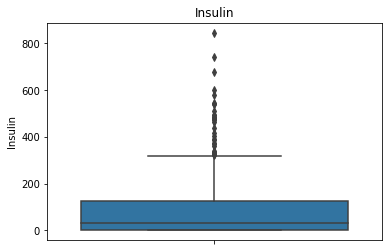

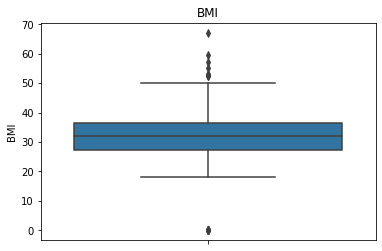

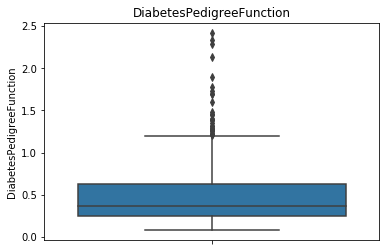

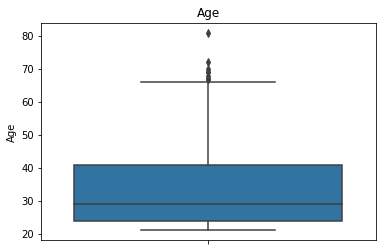

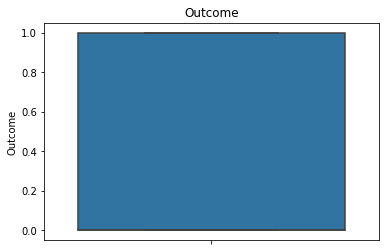

In [8]:
for columns in diabetis_data.columns:
    boxplots(diabetis_data,columns)

### Bivariate analysis

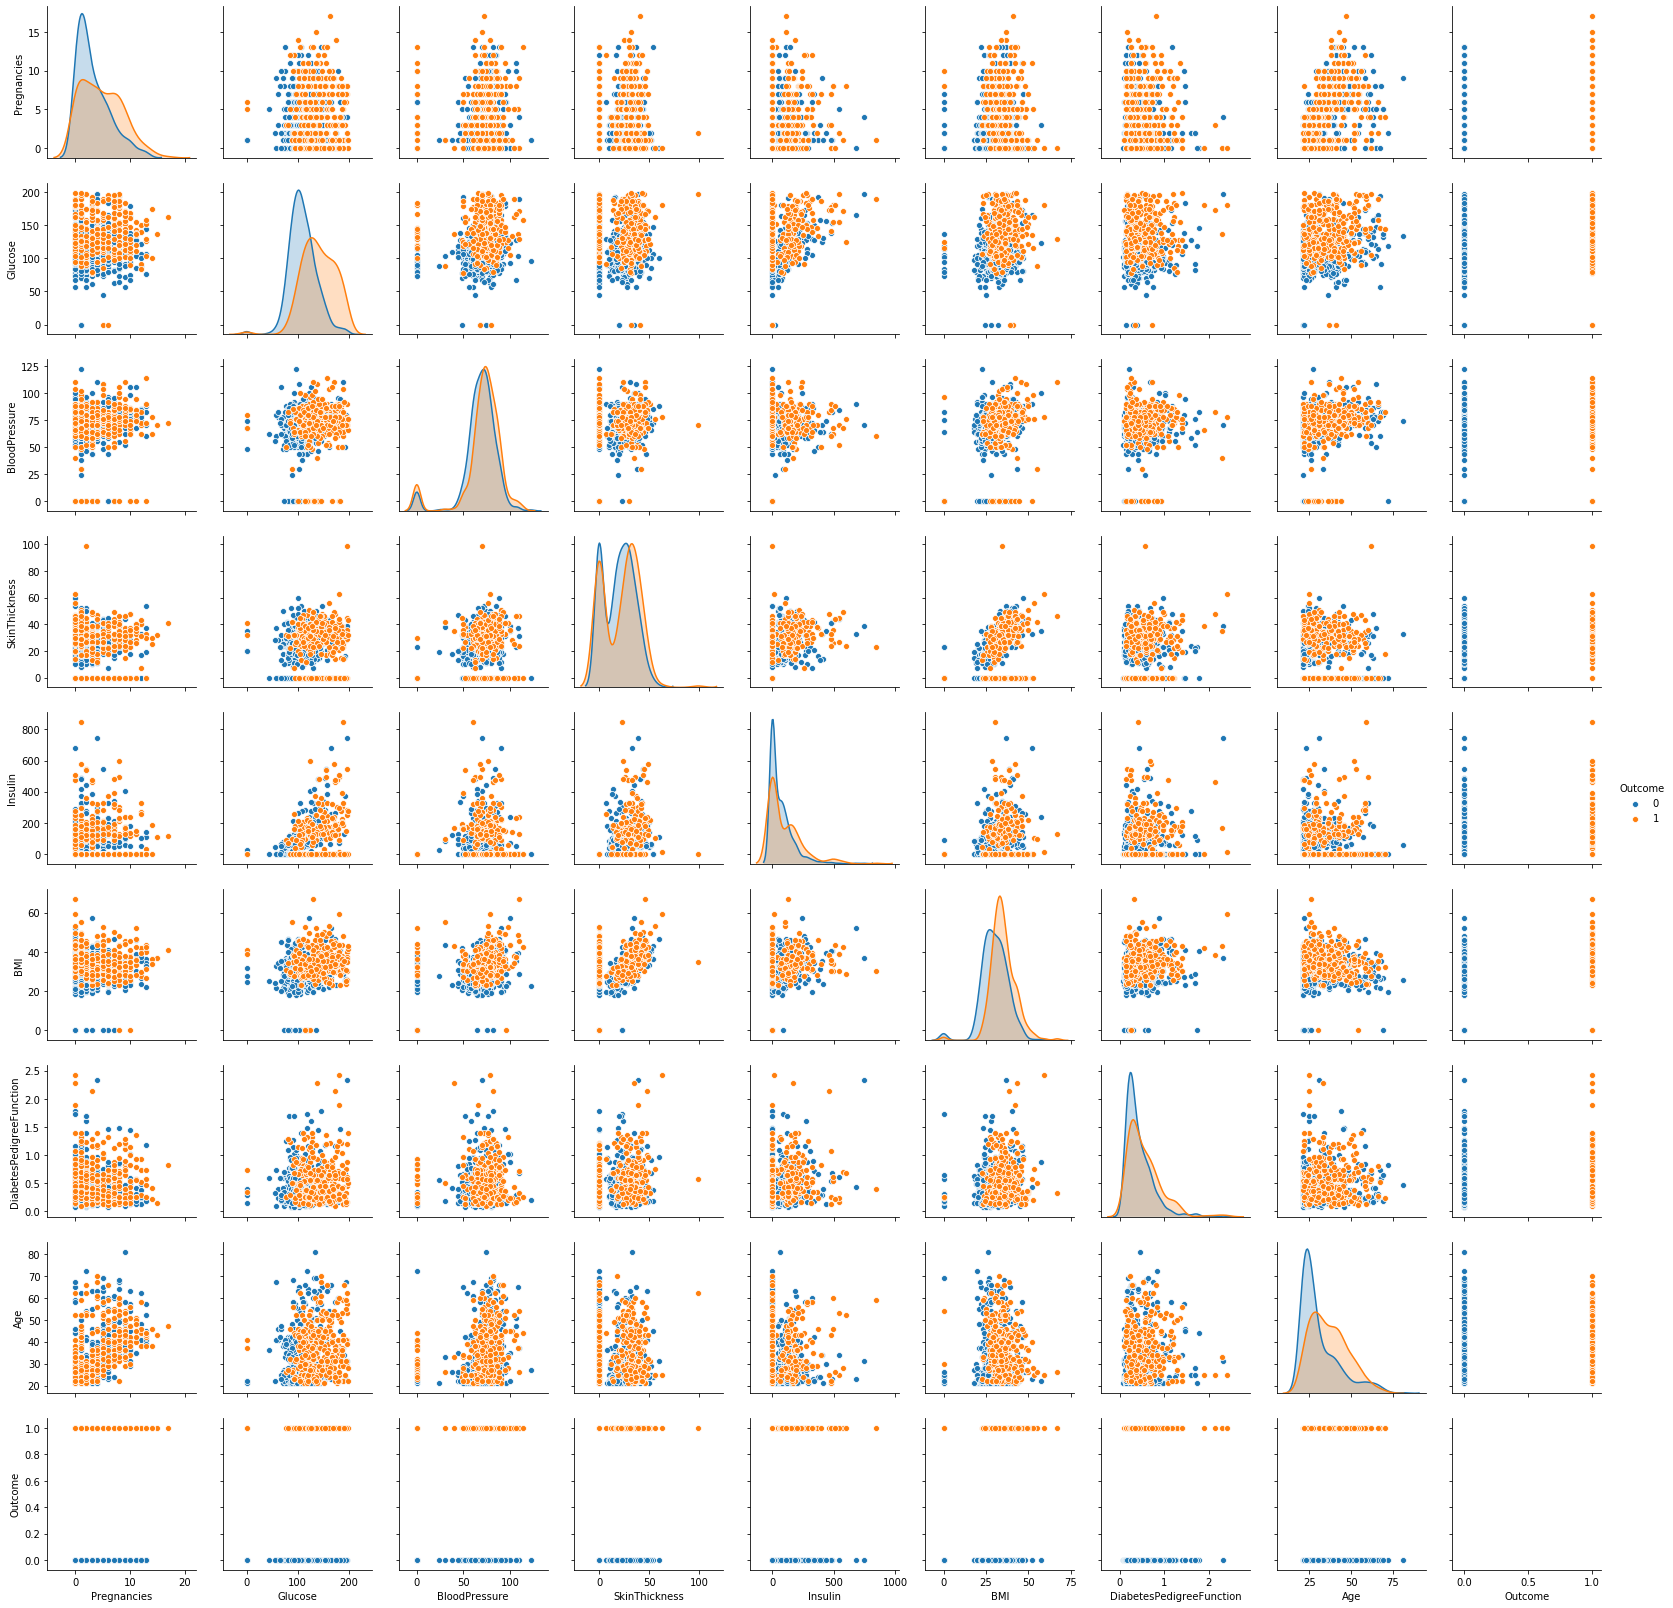

In [9]:
sns.pairplot(diabetis_data, hue = 'Outcome')

1. High glucose levles are observed during pregnencies
2. Most women have high blood pressure during pregnencies
3. Insulin levels are mostly low during pregnencies
4. BMI is high in pregnencies
5. People without diabetis have glucose levels around 100, where as most people with diabetis have glucose > 100


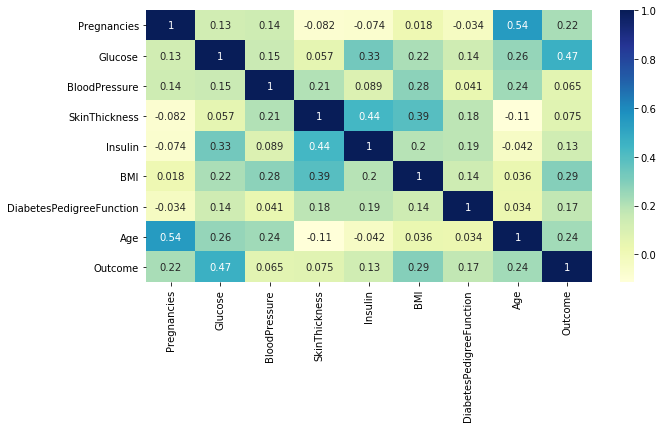

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(diabetis_data.corr(),annot=True, cmap='YlGnBu')

### Train Test split

In [11]:
X = diabetis_data.drop('Outcome', axis=1)
y = diabetis_data['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100)

### Feature Scaling

In [13]:
# instantiating the scaler object
scaler = MinMaxScaler()

# fitting on the training set
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

### Model Building with Logistic Regression

In [14]:
# instantiate logistic regression object
# setting class_weight as balanced to  handle class imbalance
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Deriving probability score on the test set
test_prob = logreg.predict_proba(X_test)[:,-1]

In [16]:
# converting test_prod to pandas data frame
test_prob_df=pd.DataFrame(test_prob)
test_prob_df.head()

,0
0,0.195214
1,0.123093
2,0.674454
3,0.167310
4,0.485041


In [17]:
# converting y_test to pandas data frame
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Outcome
173,0
253,0
207,1
737,0
191,0


In [18]:
# dropping index of y_test_df and test_prob_df
test_prob_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [19]:
# concatinating test_prob and y_test_df
y_pred_final = pd.concat([y_test_df,test_prob_df], axis =1)
y_pred_final = y_pred_final.rename(columns= {0:'outcome_probability'})
y_pred_final.head()

,Outcome,outcome_probability
0,0,0.195214
1,0,0.123093
2,1,0.674454
3,0,0.167310
4,0,0.485041


In [20]:
# setting threshold probability as 0.5 for detectin diabetis
y_pred_final['outcome_predicted'] = y_pred_final['outcome_probability'].map(lambda x: 1 if x>0.5 else 0)
y_pred_final.head()

,Outcome,outcome_probability,outcome_predicted
0,0,0.195214,0
1,0,0.123093,0
2,1,0.674454,1
3,0,0.167310,0
4,0,0.485041,0


In [21]:
# creating confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Outcome,y_pred_final.outcome_predicted)
confusion

array([[126,  24],
       [ 36,  45]])

In [22]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [23]:
sensitivity = round(TP/float(TP+FN),3)
print("sensitivity",sensitivity)
Specificity = round(TN/float(TN+FP),3)
print("specificity",Specificity)

sensitivity 0.556
specificity 0.84


In [24]:
accuracy = metrics.accuracy_score(y_pred_final.Outcome, y_pred_final.outcome_predicted)
accuracy

0.7402597402597403

In [25]:
# function for ROC curve
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

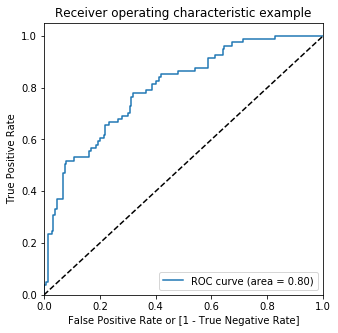

In [26]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Outcome, y_pred_final.outcome_probability, 
                                        drop_intermediate = False )

draw_roc(y_pred_final.Outcome, y_pred_final.outcome_probability)

In [27]:
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.outcome_probability.map(lambda x:1 if x>i else 0)
y_pred_final.head()

,Outcome,outcome_probability,outcome_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195214,0,1,1,0,0,0,0,0,0,0,0
1,0,0.123093,0,1,1,0,0,0,0,0,0,0,0
2,1,0.674454,1,1,1,1,1,1,1,1,0,0,0
3,0,0.167310,0,1,1,0,0,0,0,0,0,0,0
4,0,0.485041,0,1,1,1,1,1,0,0,0,0,0


In [28]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Outcome, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.350649  1.000000  0.000000
0.1   0.1  0.393939  1.000000  0.066667
0.2   0.2  0.562771  0.938272  0.360000
0.3   0.3  0.670996  0.839506  0.580000
0.4   0.4  0.718615  0.666667  0.746667
0.5   0.5  0.740260  0.555556  0.840000
0.6   0.6  0.766234  0.518519  0.900000
0.7   0.7  0.748918  0.370370  0.953333
0.8   0.8  0.722944  0.234568  0.986667
0.9   0.9  0.658009  0.049383  0.986667


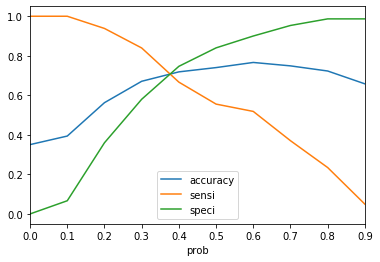

In [29]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [30]:
# setting threshold value as 0.3
y_pred_final['outcome_predicted'] = y_pred_final['outcome_probability'].map(lambda x: 1 if x>0.3 else 0)

In [31]:
print(classification_report(y_pred_final.Outcome,y_pred_final.outcome_predicted))

              precision    recall  f1-score   support

           0       0.87      0.58      0.70       150
           1       0.52      0.84      0.64        81

    accuracy                           0.67       231
   macro avg       0.69      0.71      0.67       231
weighted avg       0.75      0.67      0.68       231



### Model Building with Decision Tree

In [32]:
# building decision tree with default hyper parameters
dtree = DecisionTreeClassifier(class_weight='balanced')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
# making predictions on the test data
predicted =dtree.predict(X_test)

In [34]:
# Classification report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       150
           1       0.56      0.44      0.50        81

    accuracy                           0.68       231
   macro avg       0.65      0.63      0.63       231
weighted avg       0.67      0.68      0.67       231



### Tuning hyperparameters for decision tree

In [35]:
# Tuning max_dept

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [36]:
# Grid search results
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004455,0.002128,0.001718,0.000741,1,{'max_depth': 1},0.703704,0.750000,0.785047,0.738318,...,0.737430,0.029315,1,0.759907,0.741259,0.732558,0.744186,0.751163,0.745814,0.009234
1,0.007203,0.002914,0.002685,0.001926,2,{'max_depth': 2},0.703704,0.750000,0.654206,0.691589,...,0.702048,0.030893,7,0.759907,0.741259,0.674419,0.739535,0.751163,0.733256,0.030319
2,0.006368,0.002319,0.002212,0.000700,3,{'max_depth': 3},0.731481,0.703704,0.728972,0.728972,...,0.709497,0.029398,6,0.734266,0.757576,0.762791,0.802326,0.753488,0.762089,0.022307
3,0.007212,0.001580,0.005837,0.007285,4,{'max_depth': 4},0.740741,0.740741,0.785047,0.738318,...,0.735568,0.035814,2,0.834499,0.801865,0.813953,0.797674,0.804651,0.810529,0.013124
4,0.013023,0.005482,0.003417,0.001937,5,{'max_depth': 5},0.731481,0.694444,0.775701,0.710280,...,0.728119,0.027295,3,0.855478,0.799534,0.860465,0.858140,0.837209,0.842165,0.022844


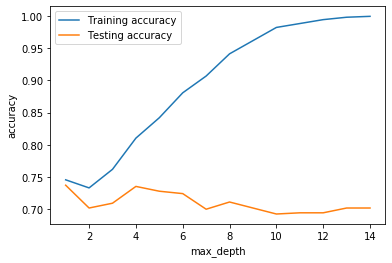

In [37]:
# ploting max_depth against accuracy 
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label="Training accuracy")
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label="Testing accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [38]:
# Tuning min_samples_leaf

# specify number of folds
n_folds = 5

# parameter to tune
parameters = {'min_samples_leaf': range(1,10)}

# instantiate the tree model
dtree = DecisionTreeClassifier(criterion='gini',
                              random_state=100, class_weight='balanced')

 # fitting the tree
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [39]:
# Grid search results
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006196,0.002037,0.001769,0.000525,1,{'min_samples_leaf': 1},0.694444,0.685185,0.719626,0.654206,...,0.703911,0.037510,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.005235,0.001606,0.001985,0.000626,2,{'min_samples_leaf': 2},0.666667,0.666667,0.747664,0.654206,...,0.690875,0.036207,9,0.962704,0.955711,0.960465,0.953488,0.955814,0.957636,0.003403
2,0.007383,0.002731,0.003082,0.001758,3,{'min_samples_leaf': 3},0.685185,0.703704,0.747664,0.672897,...,0.702048,0.025336,7,0.941725,0.934732,0.934884,0.944186,0.930233,0.937152,0.005085
3,0.004793,0.000394,0.002960,0.001848,4,{'min_samples_leaf': 4},0.712963,0.703704,0.757009,0.663551,...,0.709497,0.029660,5,0.906760,0.909091,0.909302,0.902326,0.911628,0.907821,0.003150
4,0.005503,0.001291,0.002799,0.001763,5,{'min_samples_leaf': 5},0.731481,0.703704,0.785047,0.672897,...,0.713222,0.041967,3,0.899767,0.871795,0.897674,0.888372,0.895349,0.890591,0.010151


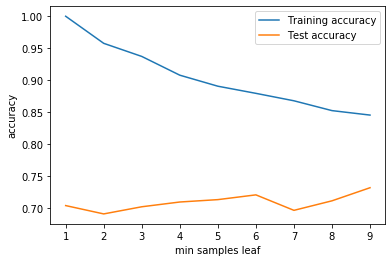

In [40]:
# ploting min_samples_leaf against accuracy 

plt.figure()
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label = "Training accuracy")
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label = "Test accuracy")
plt.xlabel("min samples leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [41]:
# Tuning min_samples_split

# specify parameter to tune
parameters = {'min_samples_split': range(2,100,20)}

# specify number of folds
n_folds =5

# instantiate the tree model 
dtree = DecisionTreeClassifier(criterion='gini', 
                              random_state=100, class_weight='balanced')

# fit the model on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds,scoring='accuracy', return_train_score=True )

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(2, 100, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [42]:
# Grid search results
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005392,0.001483,0.001431,0.000444,2,{'min_samples_split': 2},0.694444,0.685185,0.719626,0.654206,...,0.703911,0.037510,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003787,0.000773,0.001175,0.000238,22,{'min_samples_split': 22},0.722222,0.703704,0.719626,0.710280,...,0.715084,0.007008,3,0.874126,0.869464,0.879070,0.879070,0.886047,0.877555,0.005548
2,0.003571,0.000817,0.001121,0.000206,42,{'min_samples_split': 42},0.722222,0.694444,0.757009,0.710280,...,0.720670,0.020583,2,0.813520,0.794872,0.869767,0.804651,0.839535,0.824469,0.027083
3,0.003102,0.000296,0.001241,0.000459,62,{'min_samples_split': 62},0.712963,0.740741,0.766355,0.682243,...,0.722533,0.028655,1,0.785548,0.804196,0.832558,0.751163,0.832558,0.801205,0.030739
4,0.003945,0.001321,0.001363,0.000501,82,{'min_samples_split': 82},0.712963,0.703704,0.719626,0.682243,...,0.692737,0.027004,5,0.792541,0.752914,0.779070,0.751163,0.765116,0.768161,0.015774


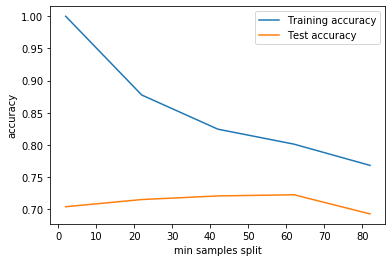

In [43]:
# ploting min_samples_split against accuracy 
plt.figure()
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'], label = "Training accuracy")
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], label = "Test accuracy")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [62]:
# building the model with best hyperparameters
param_grid = {'max_depth': 10, 
              'min_samples_leaf': 9,
              'min_samples_split': 62}

n_folds = 5

dtree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=90, min_samples_split=62,
                              random_state=100, class_weight='balanced')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=90, min_samples_split=62,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [63]:
# making predictions on test data
predicted = dtree.predict(X_test)

In [64]:
print(classification_report(y_test,predicted))
print(accuracy_score(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       150
           1       0.72      0.48      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231

0.7532467532467533


In [47]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,150,10),
    'min_samples_split': range(2,100,20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1960 candidates, totalling 9800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9800 out of 9800 | elapsed:   49.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 15),
                   

In [48]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002703,0.000416,0.001256,0.000332,entropy,1,10,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.703704,0.75,0.785047,0.738318,0.71028,0.73743,0.029315,4
1,0.002593,0.000323,0.001195,0.000363,entropy,1,10,22,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.703704,0.75,0.785047,0.738318,0.71028,0.73743,0.029315,4
2,0.003117,0.000929,0.001096,0.000107,entropy,1,10,42,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.703704,0.75,0.785047,0.738318,0.71028,0.73743,0.029315,4
3,0.002639,0.000557,0.001218,0.000259,entropy,1,10,62,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.703704,0.75,0.785047,0.738318,0.71028,0.73743,0.029315,4
4,0.002485,0.000162,0.001204,0.000389,entropy,1,10,82,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.703704,0.75,0.785047,0.738318,0.71028,0.73743,0.029315,4


In [49]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7411545623836127
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [50]:
# creating a decision with best hyper parameters
dtree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=6, 
                              min_samples_leaf=10,
                              min_samples_split=2, class_weight='balanced')

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
dtree.fit(X_test,y_test)
y_pred = dtree.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       150
           1       0.62      0.90      0.74        81

    accuracy                           0.77       231
   macro avg       0.78      0.80      0.77       231
weighted avg       0.82      0.77      0.78       231



In [54]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

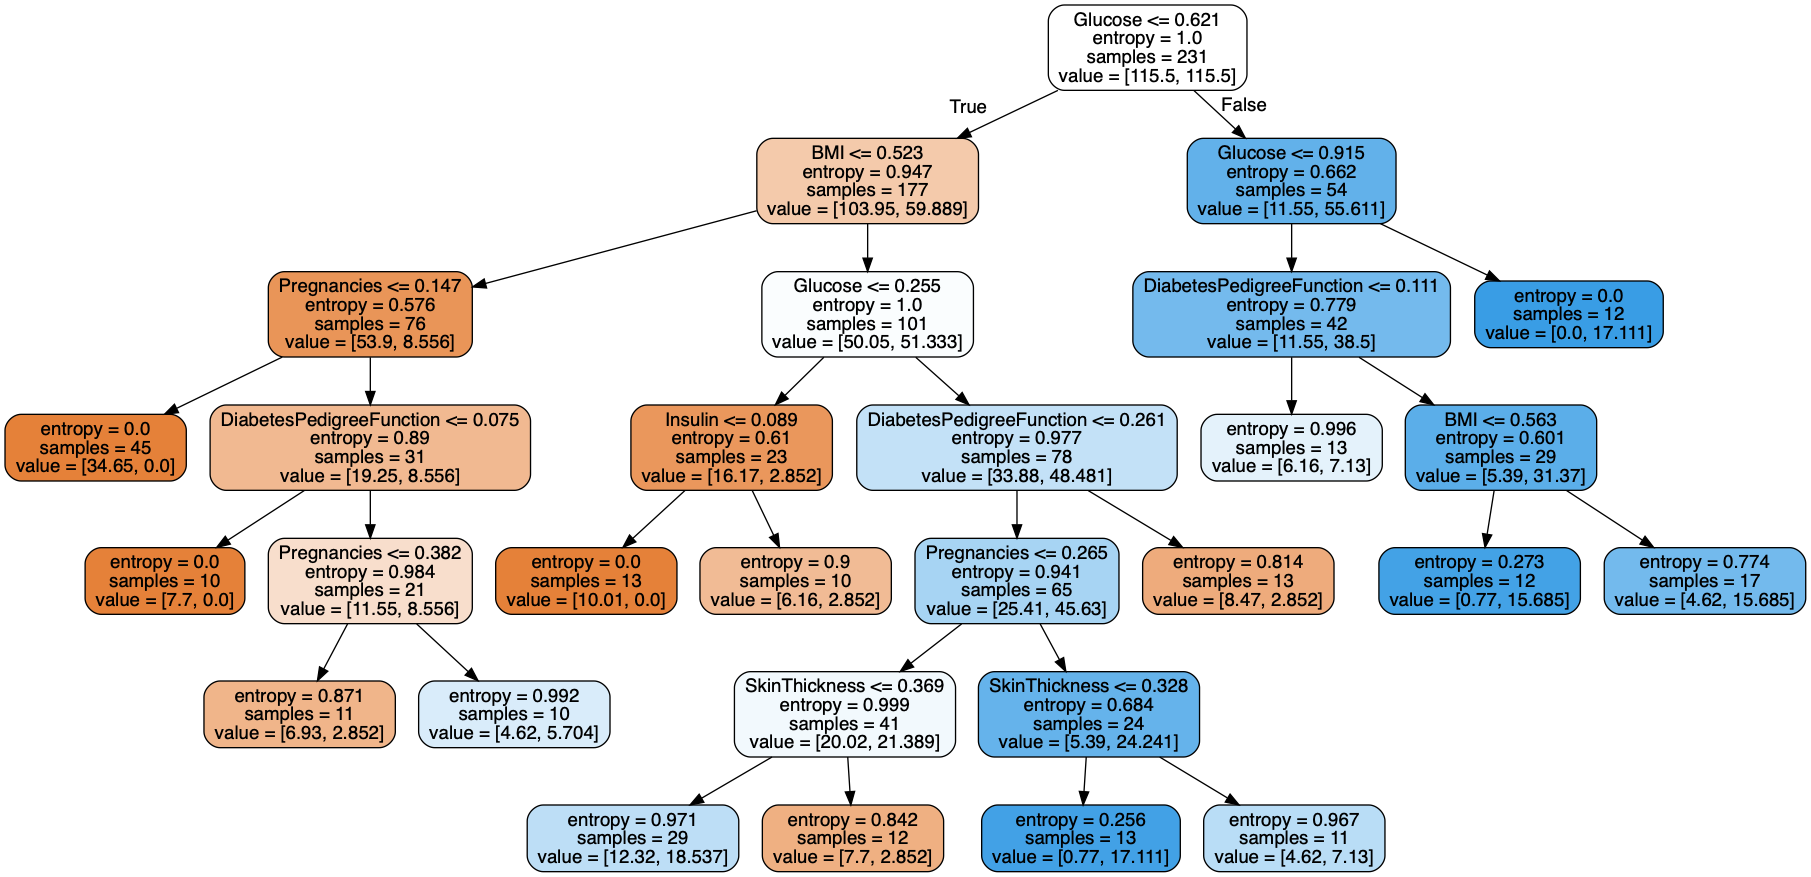

In [55]:
features = X_train.columns
# plotting the tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [56]:
feature_importance = pd.DataFrame(dtree.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.rename(columns={0:'importance'})
feature_importance['importance'] = round(feature_importance['importance'],2)
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance = feature_importance.loc[feature_importance['importance']!=0]

In [57]:
feature_importance

,importance
Glucose,0.43
BMI,0.18
Pregnancies,0.16
DiabetesPedigreeFunction,0.12
SkinThickness,0.06
Insulin,0.03


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

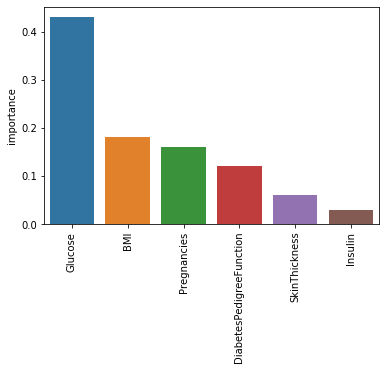

In [68]:
sns.barplot(x=feature_importance.index, y=feature_importance.importance)
plt.xticks(rotation=90)

## Model Evaluation and Summary

Since the aim of this project is to correctly identify people with diabetis, We would focus on maximising the recall score.

| Model | Accuracy | Recall |
| --- | --- | --- |
| Logistic Regression | 0.67 | 0.84 |
| Decision Tree | 0.77 | 0.90 |


From the above summary table, we can see that the logistic regression has a recall score of 84% with 67% accuracy. Decision tree has recall score of 90% and accuracy of 77%.